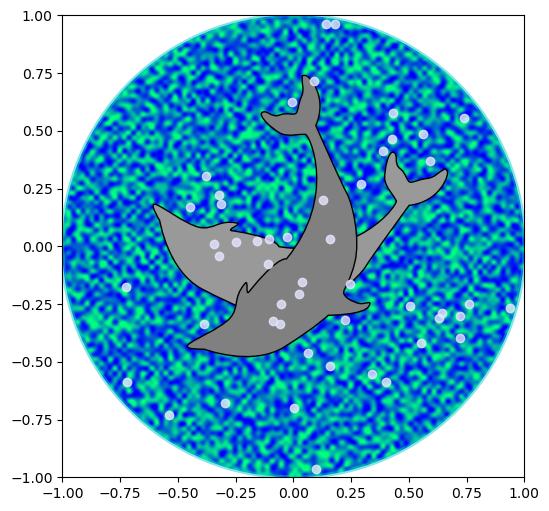

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm
from matplotlib.patches import Circle, PathPatch
from matplotlib.path import Path
from matplotlib.transforms import Affine2D

# Fixing random state for reproducibility
np.random.seed(19680801)


r = np.random.rand(50)
t = np.random.rand(50) * np.pi * 2.0
x = r * np.cos(t)
y = r * np.sin(t)

fig, ax = plt.subplots(figsize=(6, 6))
circle = Circle((0, 0), 1, facecolor='none',
                edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
ax.add_patch(circle)

im = plt.imshow(np.random.random((100, 100)),
                origin='lower', cmap=cm.winter,
                interpolation='spline36',
                extent=(-1, 1, -1, 1))
im.set_clip_path(circle)

plt.plot(x, y, 'o', color=(0.9, 0.9, 1.0), alpha=0.8)

# Dolphin from OpenClipart library by Andy Fitzsimon
#   <cc:License rdf:about="http://web.resource.org/cc/PublicDomain">
#     <cc:permits rdf:resource="http://web.resource.org/cc/Reproduction"/>
#     <cc:permits rdf:resource="http://web.resource.org/cc/Distribution"/>
#     <cc:permits rdf:resource="http://web.resource.org/cc/DerivativeWorks"/>
#   </cc:License>

dolphin = """
M -0.59739425,160.18173 C -0.62740401,160.18885 -0.57867129,160.11183
-0.57867129,160.11183 C -0.57867129,160.11183 -0.5438361,159.89315
-0.39514638,159.81496 C -0.24645668,159.73678 -0.18316813,159.71981
-0.18316813,159.71981 C -0.18316813,159.71981 -0.10322971,159.58124
-0.057804323,159.58725 C -0.029723983,159.58913 -0.061841603,159.60356
-0.071265813,159.62815 C -0.080250183,159.65325 -0.082918513,159.70554
-0.061841203,159.71248 C -0.040763903,159.7194 -0.0066711426,159.71091
0.077336307,159.73612 C 0.16879567,159.76377 0.28380306,159.86448
0.31516668,159.91533 C 0.3465303,159.96618 0.5011127,160.1771
0.5011127,160.1771 C 0.63668998,160.19238 0.67763022,160.31259
0.66556395,160.32668 C 0.65339985,160.34212 0.66350443,160.33642
0.64907098,160.33088 C 0.63463742,160.32533 0.61309688,160.297
0.5789627,160.29339 C 0.54348657,160.28968 0.52329693,160.27674
0.50728856,160.27737 C 0.49060916,160.27795 0.48965803,160.31565
0.46114204,160.33673 C 0.43329696,160.35786 0.4570711,160.39871
0.43309565,160.40685 C 0.4105108,160.41442 0.39416631,160.33027
0.3954995,160.2935 C 0.39683269,160.25672 0.43807996,160.21522
0.44567915,160.19734 C 0.45327833,160.17946 0.27946869,159.9424
-0.061852613,159.99845 C -0.083965233,160.0427 -0.26176109,160.06683
-0.26176109,160.06683 C -0.30127962,160.07028 -0.21167141,160.09731
-0.24649368,160.1011 C -0.32642366,160.11569 -0.34521187,160.06895
-0.40622293,160.0819 C -0.467234,160.09485 -0.56738444,160.17461
-0.59739425,160.18173
"""

vertices = []
codes = []
parts = dolphin.split()
i = 0
code_map = {
    'M': Path.MOVETO,
    'C': Path.CURVE4,
    'L': Path.LINETO,
}

while i < len(parts):
    path_code = code_map[parts[i]]
    npoints = Path.NUM_VERTICES_FOR_CODE[path_code]
    codes.extend([path_code] * npoints)
    vertices.extend([[*map(float, y.split(','))]
                     for y in parts[i + 1:][:npoints]])
    i += npoints + 1
vertices = np.array(vertices)
vertices[:, 1] -= 160

dolphin_path = Path(vertices, codes)
dolphin_patch = PathPatch(dolphin_path, facecolor=(0.6, 0.6, 0.6),
                          edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch)

vertices = Affine2D().rotate_deg(60).transform(vertices)
dolphin_path2 = Path(vertices, codes)
dolphin_patch2 = PathPatch(dolphin_path2, facecolor=(0.5, 0.5, 0.5),
                           edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch2)

plt.show()